In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape


(889, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.5+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [7]:
# Drop irrelevant data
df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["Sex"] = le.fit_transform(df["Sex"])
df["Embarked"] = le.fit_transform(df["Embarked"])

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


<AxesSubplot:>

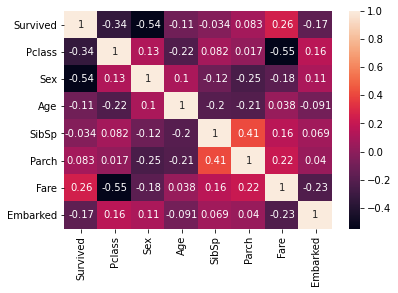

In [19]:
sns.heatmap(df.corr(),annot=True)

In [20]:
x = df.drop(["Survived"],axis=1)
y = df.iloc[:,:1]

In [21]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [22]:
# Tree Model
tree_model=tree.DecisionTreeClassifier(max_depth=8)
tree_model.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
tree_model.score(x,y)

0.906636670416198

In [24]:
# Applying Random Forest
rf = RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)
rf.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
rf.oob_score_


0.8020247469066367

In [27]:
for feature,imp in zip(x, rf.feature_importances_):
    print(feature,":",imp);

Pclass : 0.08426943202512095
Sex : 0.26008172241322725
Age : 0.2583092541909238
SibSp : 0.050848547103323344
Parch : 0.03998126506092968
Fare : 0.272138532550303
Embarked : 0.03437124665617191


__Inference__

Pclass, Sex , Age, Fare have value more than 0.05 which means they are important feature and affect the prediction of Survived Persons

In [30]:
imp = df[['Pclass', 'Sex', 'Age', 'Fare']]
model = tree.DecisionTreeClassifier(max_depth=8)
model.fit(imp,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
model.score(imp,y)

0.8965129358830146

In [34]:
# Tree formation
with open('dtree_titanic.dot','w')as f:
    f=tree.export_graphviz(model,feature_names=['Pclass', 'Sex', 'Age', 'Fare'],out_file=f);

In [35]:
from sklearn.tree import export_text
feature=['Pclass', 'Sex', 'Age', 'Fare']
r=export_text(model,feature_names=feature)
print(r)

|--- Sex <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 2.50
|   |   |   |--- Fare <= 88.78
|   |   |   |   |--- class: 1
|   |   |   |--- Fare >  88.78
|   |   |   |   |--- class: 0
|   |   |--- Age >  2.50
|   |   |   |--- Fare <= 28.86
|   |   |   |   |--- Fare <= 28.23
|   |   |   |   |   |--- Age <= 56.00
|   |   |   |   |   |   |--- Age <= 23.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Age >  23.50
|   |   |   |   |   |   |   |--- Age <= 27.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Age >  27.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  56.00
|   |   |   |   |   |   |--- Pclass <= 1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Pclass >  1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Fare >  28.23
|   |   |   |   |   |--- class: 0
|   |   |   |--- Fare >  28.86
|   |   |   |   |--- Fare <= 149.04
|   |   |   |   |   |--- cl